In [ ]:
#PCA
#import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


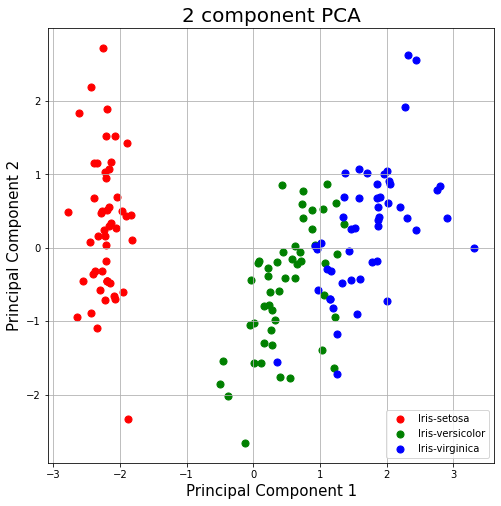

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

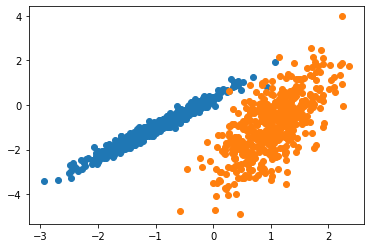

In [ ]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
 
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

# Affinity Propagation
Affinity Propagation involves finding a set of exemplars that best summarize the data.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.



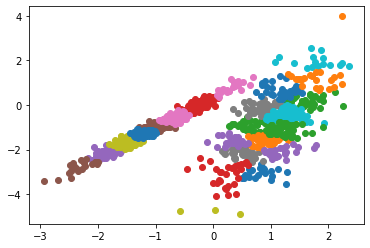

In [ ]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = AffinityPropagation()

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

In [ ]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

# Hierarchical Clustering
Agglomerative clustering involves merging examples until the desired number of clusters is achieved.
It is a part of a broader class of hierarchical clustering methods.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable grouping is found.


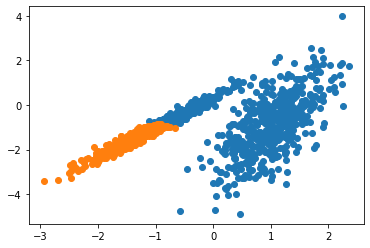

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
import numpy as np

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster

for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

In [ ]:
clusters

array([0, 1])

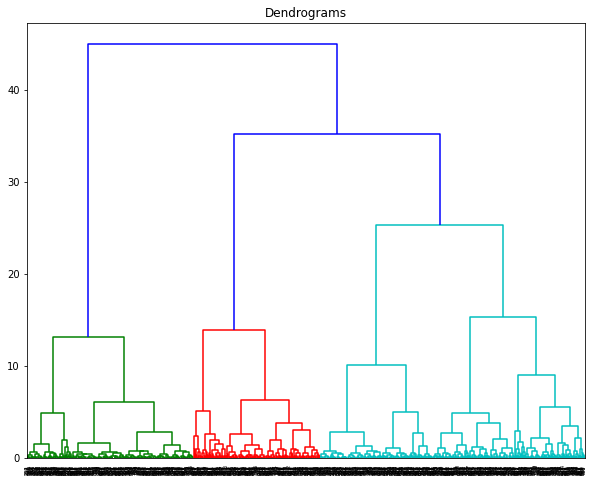

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

#DBSCAN
DBSCAN Clustering involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

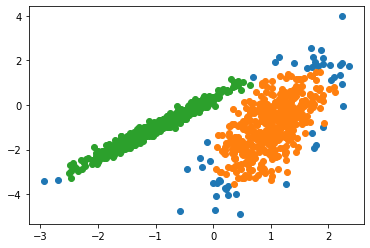

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = DBSCAN(eps=0.30, min_samples=9)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

# K-Means

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

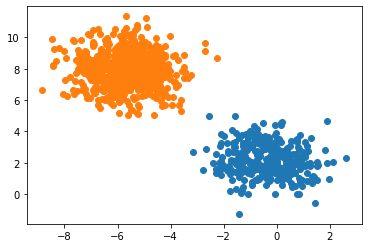

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# define dataset
X, y = make_blobs(n_samples=1000, random_state=5)

# define the model
model = KMeans(n_clusters=2)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

##Elbow Method for K-Means Clustering

In [ ]:
# Create a list includes inertia for different k values
# inertia: Sum of squared distances of samples to their closest cluster center.
var = []
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    
    print(f"{k}:{model.inertia_}")
    var.append(model.inertia_)  

1:15792.758057460494
2:2153.103084237862
3:1610.7094095323146
4:1330.002804747619
5:1093.6667079073989
6:940.2007813992409
7:787.7690492935872
8:708.0384871357257
9:637.9545116648226


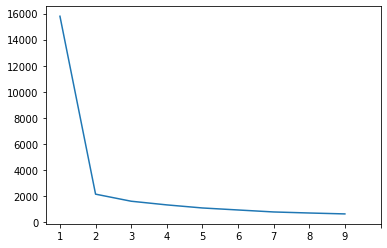

In [ ]:
plt.plot(var)
plt.xticks(range(10), range(1, 10))
plt.show()

2:2153.103084237862
3:1610.7094095323146
4:1329.6429134915606
5:1096.5625891629845
6:941.4099591893191
7:787.7671898756777
8:700.4044615305215
9:638.372927649146
10:576.2884296618197


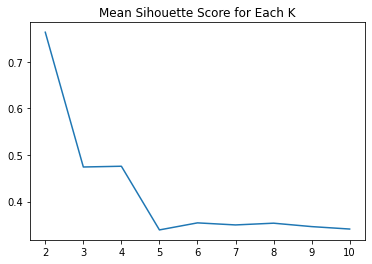

In [ ]:
#Silhouette Score
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette = []

for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    label=model.predict(X)

    print(f"{k}:{model.inertia_}")
    silhouette.append(silhouette_score(X, label))
    
ax = plt.plot(silhouette)
plt.xticks(range(9), range(2, 11))
plt.title("Mean Sihouette Score for Each K")
plt.show()

In [ ]:
print(silhouette)

[0.7637501248824675, 0.47435976524419116, 0.4759633844018245, 0.3392217343645222, 0.35435369602107203, 0.3499240847943903, 0.35367465390036495, 0.3463436202983164, 0.3411021434768758]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


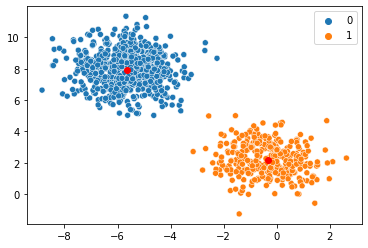

In [ ]:
# Final run
import seaborn as sns

model = KMeans(n_clusters=2, random_state=5)
model.fit(X)

clusters = model.predict(X)

sns.scatterplot(X.T[0], X.T[1], hue=clusters);
plt.scatter(x=model.cluster_centers_[0][0], 
            y=model.cluster_centers_[0][1], 
            color='r');
            
plt.scatter(x=model.cluster_centers_[1][0], 
            y=model.cluster_centers_[1][1], 
            color='r');

# Mini-Batch K-Means
Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.



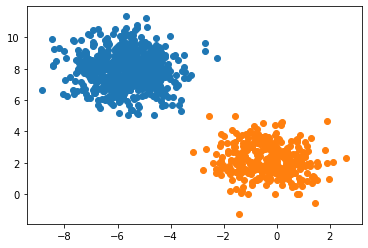

In [ ]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
from sklearn.datasets import make_blobs

# define dataset
X, _ = make_blobs(n_samples=1000, random_state=5)

# define the model
model = MiniBatchKMeans(n_clusters=2,  batch_size=100)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()